# Europe Fuel Prices

## Data

http://www.fuel-prices-europe.info/

In [1]:
FULL_DATA = 'data/europe-fuel-prices-final.csv'
SHAPE_FILE = 'data/ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes'

## Global imports

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['cmb10', 'Adobe Caslon Pro', 'Palatino Linotype']

%matplotlib inline

## Load data

In [3]:
import pandas as pd
import numpy as np


# Load from CSV
df = pd.read_csv(FULL_DATA, delimiter=';')

df.head(5)

,country,eu,europe,unleaded_95_eur,diesel_eur,lpg_eur,lpg_nozzle,lpg_stations,record_date,currency,unleaded_95_local_price,diesel_local_price,lpg_local_price
0,Albania,No,Yes,1.410540,1.385938,0.590459,Dish,70,"January 2, 2020",ALL,172.000,169.000,72.000
1,Algeria,No,No,0.169721,0.102884,0.067588,Unknown,Unknown,"January 2, 2020",DZD,22.600,13.700,9.000
2,Andorra,No,Yes,1.164000,1.054000,NaN,Unknown,1,"January 2, 2020",EUR,1.164,1.054,NaN
3,Armenia,No,Yes,0.954450,0.898305,NaN,Unknown,Unknown,"January 2, 2020",AMD,510.000,480.000,NaN
4,Austria,Yes,Yes,1.169000,1.155000,0.779000,Dish,26,"January 2, 2020",EUR,1.169,1.155,0.779


In [4]:
# Remove non-european countries
df = df[df['europe'] == 'Yes']

In [5]:
from geonamescache.mappers import country

# Create a mapper that gets the ISO3 code from the country name
mapper = country(from_key='name', to_key='iso3')

# Add new column to dataframe with the ISO3 codes and set it as index
df['iso3'] = df.apply(lambda row : mapper(row['country']), axis=1)
df.set_index('iso3', inplace=True)

df.head(5)

,country,eu,europe,unleaded_95_eur,diesel_eur,lpg_eur,lpg_nozzle,lpg_stations,record_date,currency,unleaded_95_local_price,diesel_local_price,lpg_local_price
iso3,,,,,,,,,,,,,
ALB,Albania,No,Yes,1.410540,1.385938,0.590459,Dish,70,"January 2, 2020",ALL,172.000,169.000,72.000
AND,Andorra,No,Yes,1.164000,1.054000,NaN,Unknown,1,"January 2, 2020",EUR,1.164,1.054,NaN
ARM,Armenia,No,Yes,0.954450,0.898305,NaN,Unknown,Unknown,"January 2, 2020",AMD,510.000,480.000,NaN
AUT,Austria,Yes,Yes,1.169000,1.155000,0.779000,Dish,26,"January 2, 2020",EUR,1.169,1.155,0.779
BLR,Belarus,No,Yes,0.734775,0.734775,0.386500,Unknown,39,"January 2, 2020",BYN,1.730,1.730,0.910


## Plot gasoline prices

In [6]:
# Map configuration
NUM_COLORS = 9
title = 'Unleaded 95 price (€/L)'
description = f"""Source: www.fuel-prices-europe.info
Date: {df['record_date'][0]}
joseaniceto.com
"""

In [7]:
# Get gasoline prices and colormap
values = df['unleaded_95_eur']
cm = plt.get_cmap('inferno_r')
scheme = [cm(i / NUM_COLORS) for i in range(NUM_COLORS)]
bins = np.linspace(values.min(), values.max(), NUM_COLORS)
df['bin_unleaded_95'] = np.digitize(values, bins) - 1
df.sort_values('bin_unleaded_95', ascending=False).head(10)

,country,eu,europe,unleaded_95_eur,diesel_eur,lpg_eur,lpg_nozzle,lpg_stations,record_date,currency,unleaded_95_local_price,diesel_local_price,lpg_local_price,bin_unleaded_95
iso3,,,,,,,,,,,,,,
NLD,Netherlands,Yes,Yes,1.804000,1.524000,0.879000,Bayonet,1480,"January 2, 2020",EUR,1.804,1.524,0.879,8
NOR,Norway,No,Yes,1.778985,1.697660,0.818333,Dish,100,"January 2, 2020",NOK,17.500,16.700,8.050,7
ISL,Iceland,No,Yes,1.702114,1.664143,NaN,Unknown,Unknown,"January 2, 2020",ISK,233.100,227.900,NaN,7
DNK,Denmark,Yes,Yes,1.698077,1.524121,NaN,Dish,34,"January 2, 2020",DKK,12.690,11.390,NaN,7
SWE,Sweden,Yes,Yes,1.516132,1.563869,0.859269,Dish,16,"January 2, 2020",SEK,15.880,16.380,9.000,6
PRT,Portugal,Yes,Yes,1.569000,1.474000,0.699000,Dish,244,"January 2, 2020",EUR,1.569,1.474,0.699,6
BEL,Belgium,Yes,Yes,1.558000,1.590000,0.575000,Acme,615,"January 2, 2020",EUR,1.558,1.590,0.575,6
ITA,Italy,Yes,Yes,1.630000,1.524000,0.608000,Dish,2346,"January 2, 2020",EUR,1.630,1.524,0.608,6
GRC,Greece,Yes,Yes,1.618000,1.459000,0.849000,Dish,41,"January 2, 2020",EUR,1.618,1.459,0.849,6


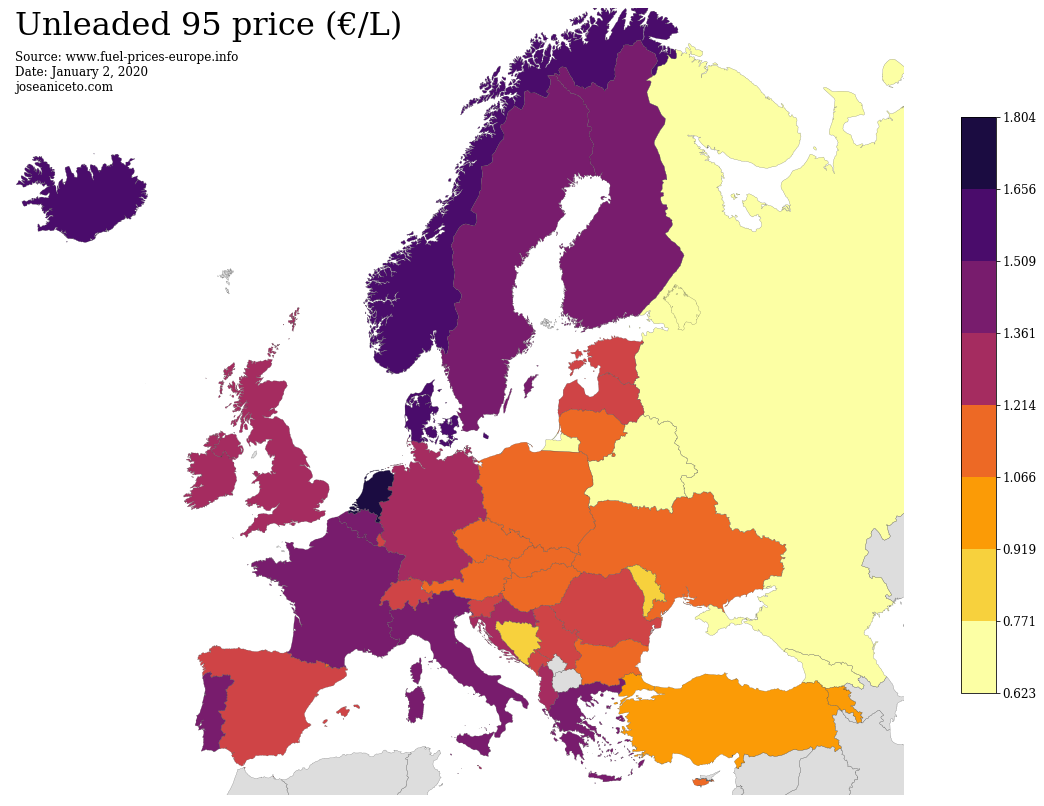

In [8]:
fig = plt.figure(figsize=(16, 20))

ax = fig.add_subplot(111, frame_on=False)

m = Basemap(projection='merc', llcrnrlat=34, urcrnrlat=71, llcrnrlon=-25, urcrnrlon=50, resolution='c')
m.drawmapboundary(color='w')

m.readshapefile(SHAPE_FILE, 'units', color='#444444', linewidth=.2)

printed_names = []
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in df.index:
        color = '#dddddd'
    else:
        color = scheme[df.loc[iso3]['bin_unleaded_95']]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
    
# Add info
plt.annotate(title, xy=(0.005, 0.965), size=32, xycoords='axes fraction', backgroundcolor='w')
plt.annotate(description, xy=(0.005, 0.875), size=12, xycoords='axes fraction', backgroundcolor='w')

# Draw color legend.
ax_legend = fig.add_axes([0.95, 0.3, 0.03, 0.4], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='vertical')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
cb.ax.tick_params(labelsize=12)

## Create choropleth map

In [9]:
def create_choropleth(df, data, bin_name, title, description, num_colors=9, colormap_name='inferno_r'):
    """Creates the choropleth plot for a type of data (type of fuel)"""
    
    # Get gasoline prices and colormap
    values = df[data]
    cm = plt.get_cmap('inferno_r')
    scheme = [cm(i / num_colors) for i in range(num_colors)]
    bins = np.linspace(values.min(), values.max(), num_colors)
    df[bin_name] = np.digitize(values, bins) - 1
    
    # Create figure
    fig = plt.figure(figsize=(16, 20))
    ax = fig.add_subplot(111, frame_on=False)
    
    # Create map
    m = Basemap(projection='merc', llcrnrlat=34, urcrnrlat=71, llcrnrlon=-25, urcrnrlon=50, resolution='c')
    m.drawmapboundary(color='w')

    m.readshapefile(SHAPE_FILE, 'units', color='#444444', linewidth=.2)
    for info, shape in zip(m.units_info, m.units):
        iso3 = info['ADM0_A3']
        if iso3 not in df.index:
            color = '#dddddd'
        else:
            color = scheme[df.loc[iso3][bin_name]]

        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax.add_collection(pc)

    # Add info
    plt.annotate(title, xy=(0.005, 0.965), size=32, xycoords='axes fraction', backgroundcolor='w')
    plt.annotate(description, xy=(0.005, 0.875), size=12, xycoords='axes fraction', backgroundcolor='w')

    # Draw color legend.
    ax_legend = fig.add_axes([0.95, 0.3, 0.03, 0.4], zorder=3)
    cmap = mpl.colors.ListedColormap(scheme)
    cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='vertical')
    cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
    cb.ax.tick_params(labelsize=12)

### Gasoline (Unleaded 95) prices

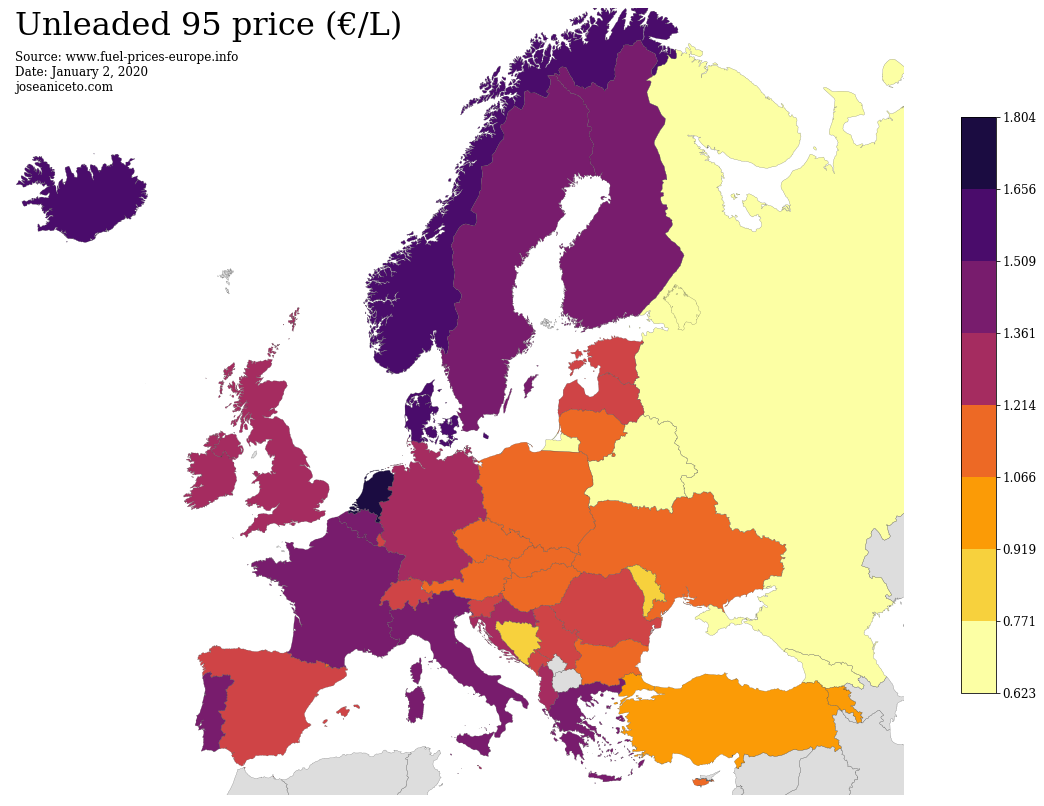

In [10]:
title = 'Unleaded 95 price (€/L)'
description = f"""Source: www.fuel-prices-europe.info
Date: {df['record_date'][0]}
joseaniceto.com
"""

create_choropleth(df, 'unleaded_95_eur', 'bin_unleaded_95', title, description, num_colors=9, colormap_name='inferno_r')

plt.savefig('choropleth_unleaded_95.png', bbox_inches='tight', pad_inches=.2)

### Diesel price

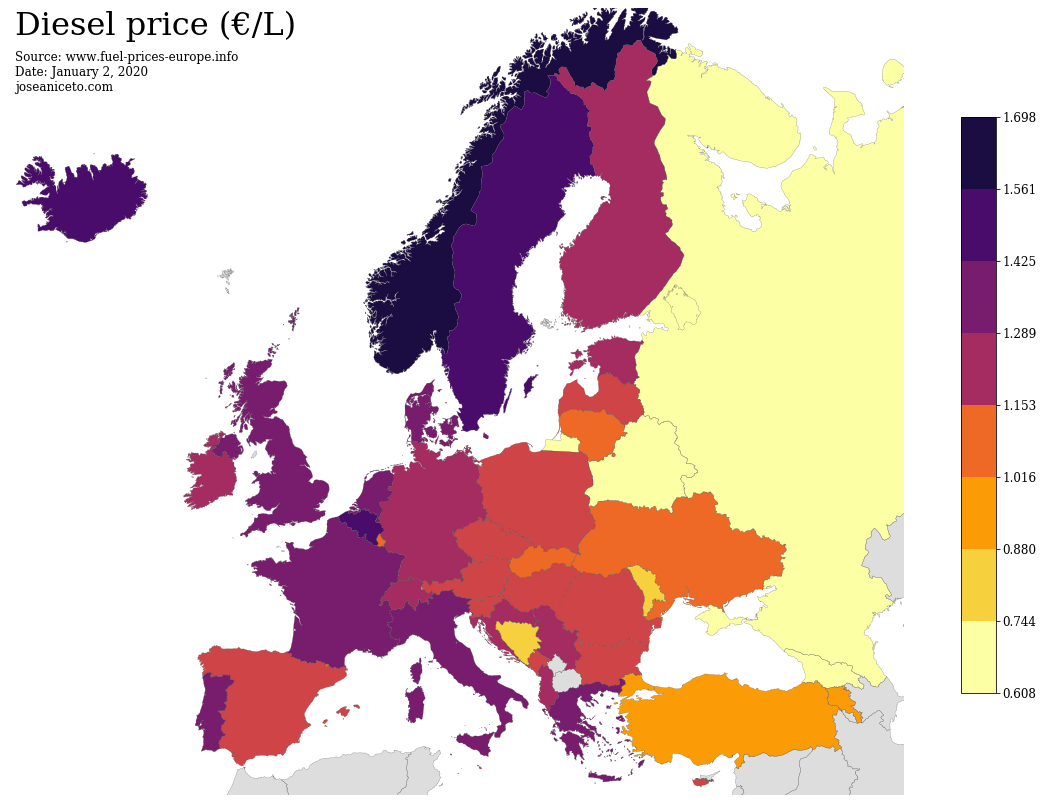

In [11]:
title = 'Diesel price (€/L)'
description = f"""Source: www.fuel-prices-europe.info
Date: {df['record_date'][0]}
joseaniceto.com
"""

create_choropleth(df, 'diesel_eur', 'bin_diesel', title, description, num_colors=9, colormap_name='inferno_r')

plt.savefig('choropleth_diesel.png', bbox_inches='tight', pad_inches=.2)

### LPG price

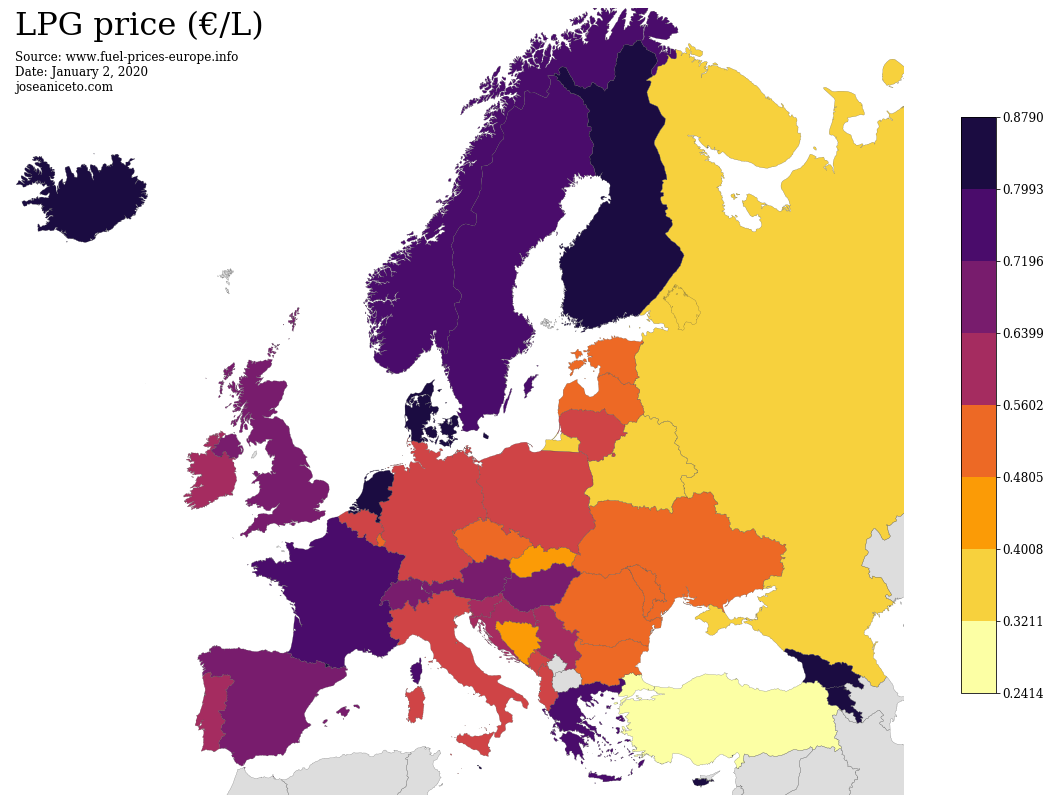

In [12]:
title = 'LPG price (€/L)'
description = f"""Source: www.fuel-prices-europe.info
Date: {df['record_date'][0]}
joseaniceto.com
"""

create_choropleth(df, 'lpg_eur', 'bin_lpg', title, description, num_colors=9, colormap_name='inferno_r')

plt.savefig('choropleth_lpg.png', bbox_inches='tight', pad_inches=.2)

## Create choropleth map with labels

In [13]:
def create_choropleth_labels(df, data, bin_name, title, description, num_colors=9, colormap_name='inferno_r'):
    """Creates the choropleth plot for a type of data (type of fuel) and adds labels"""
    
    # Get gasoline prices and colormap
    values = df[data]
    cm = plt.get_cmap('inferno_r')
    scheme = [cm(i / num_colors) for i in range(num_colors)]
    bins = np.linspace(values.min(), values.max(), num_colors)
    df[bin_name] = np.digitize(values, bins) - 1

    # Create figure
    fig = plt.figure(figsize=(16, 20))
    ax = fig.add_subplot(111, frame_on=False)
    
    # Create map
    m = Basemap(projection='merc', llcrnrlat=34, urcrnrlat=71, llcrnrlon=-25, urcrnrlon=50, resolution='c')
    m.drawmapboundary(color='w')

    m.readshapefile(SHAPE_FILE, 'units', color='#444444', linewidth=.2)
    
    printed_names = []
    for info, shape in zip(m.units_info, m.units):
        iso3 = info['ADM0_A3']
        if iso3 not in df.index:
            color = '#dddddd'
        else:
            color = scheme[df.loc[iso3][bin_name]]

        patches = [Polygon(np.array(shape), True)]
        pc = PatchCollection(patches)
        pc.set_facecolor(color)
        ax.add_collection(pc)
        
        # Add label
        try:
            # Check if country is already printed
            if df.loc[iso3][data] in printed_names: continue
                
            # Get center of polygon
            x, y = np.array(shape).mean(axis=0)
            
            # Check if is inside map, draw label
            if m.llcrnry < y < m.urcrnry and m.llcrnrx < x < m.urcrnrx:
                label = str(round(df.loc[iso3][data], 3))
                plt.text(x, y, label, ha='center', zorder=10, fontsize=14)
                printed_names += [df.loc[iso3][data],] 
        except KeyError as e:
            pass

    # Add info
    plt.annotate(title, xy=(0.005, 0.965), size=32, xycoords='axes fraction', backgroundcolor='w')
    plt.annotate(description, xy=(0.005, 0.875), size=12, xycoords='axes fraction', backgroundcolor='w')

    # Draw color legend.
    ax_legend = fig.add_axes([0.95, 0.3, 0.03, 0.4], zorder=3)
    cmap = mpl.colors.ListedColormap(scheme)
    cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='vertical')
    cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])
    cb.ax.tick_params(labelsize=12)

### Unleaded 95 price

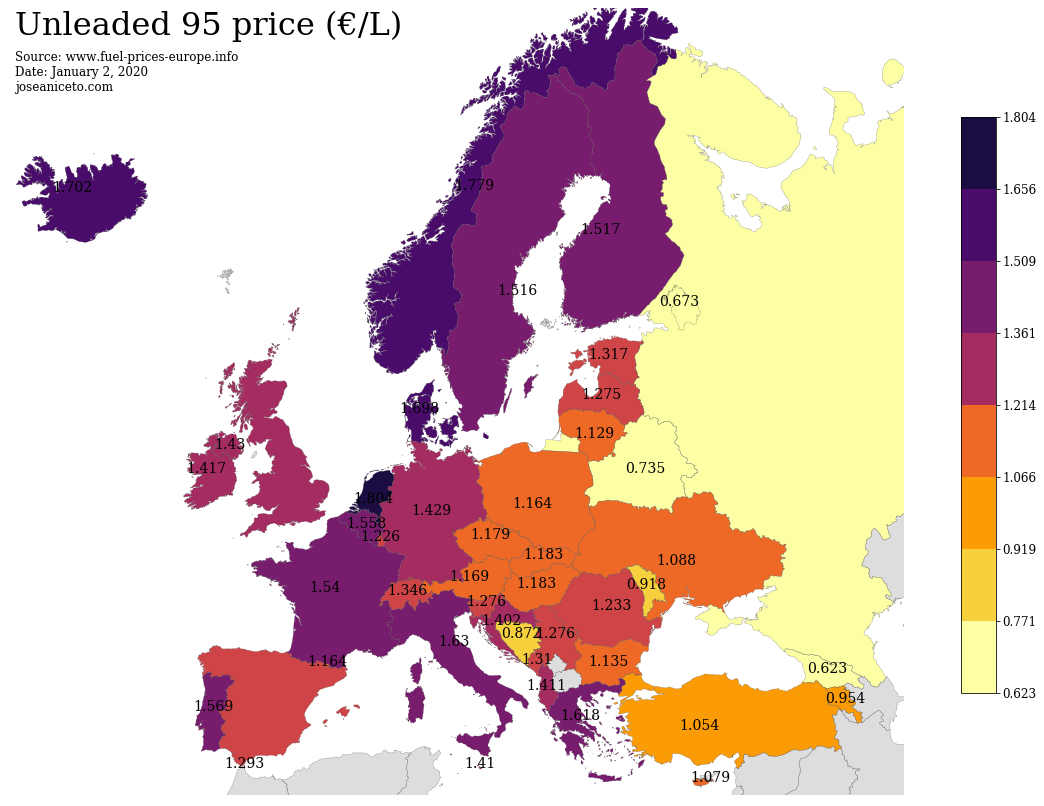

In [17]:
title = 'Unleaded 95 price (€/L)'
description = f"""Source: www.fuel-prices-europe.info
Date: {df['record_date'][0]}
joseaniceto.com
"""

create_choropleth_labels(df, 'unleaded_95_eur', 'bin_unleaded_95', title, description, num_colors=9, colormap_name='inferno_r')

plt.savefig('choropleth_unleaded_95.svg', bbox_inches='tight', pad_inches=.2)

### Diesel price

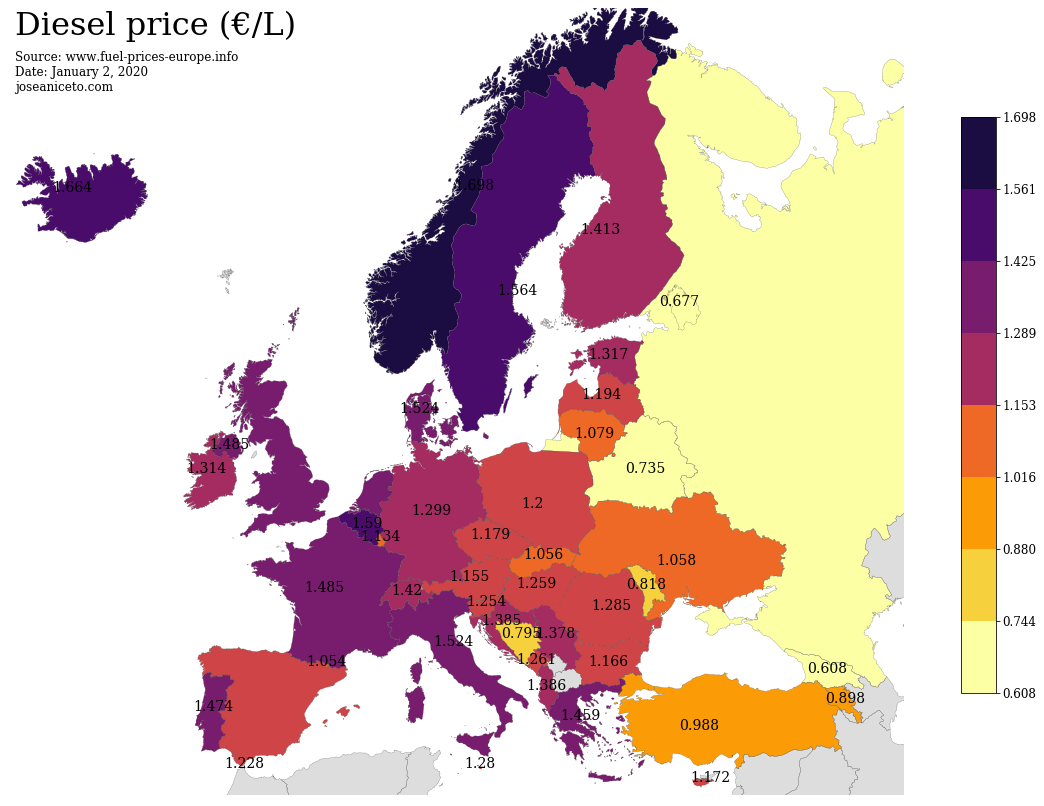

In [15]:
title = 'Diesel price (€/L)'
description = f"""Source: www.fuel-prices-europe.info
Date: {df['record_date'][0]}
joseaniceto.com
"""

create_choropleth_labels(df, 'diesel_eur', 'bin_diesel', title, description, num_colors=9, colormap_name='inferno_r')

plt.savefig('choropleth_diesel_95.svg', bbox_inches='tight', pad_inches=.2)

### LPG price

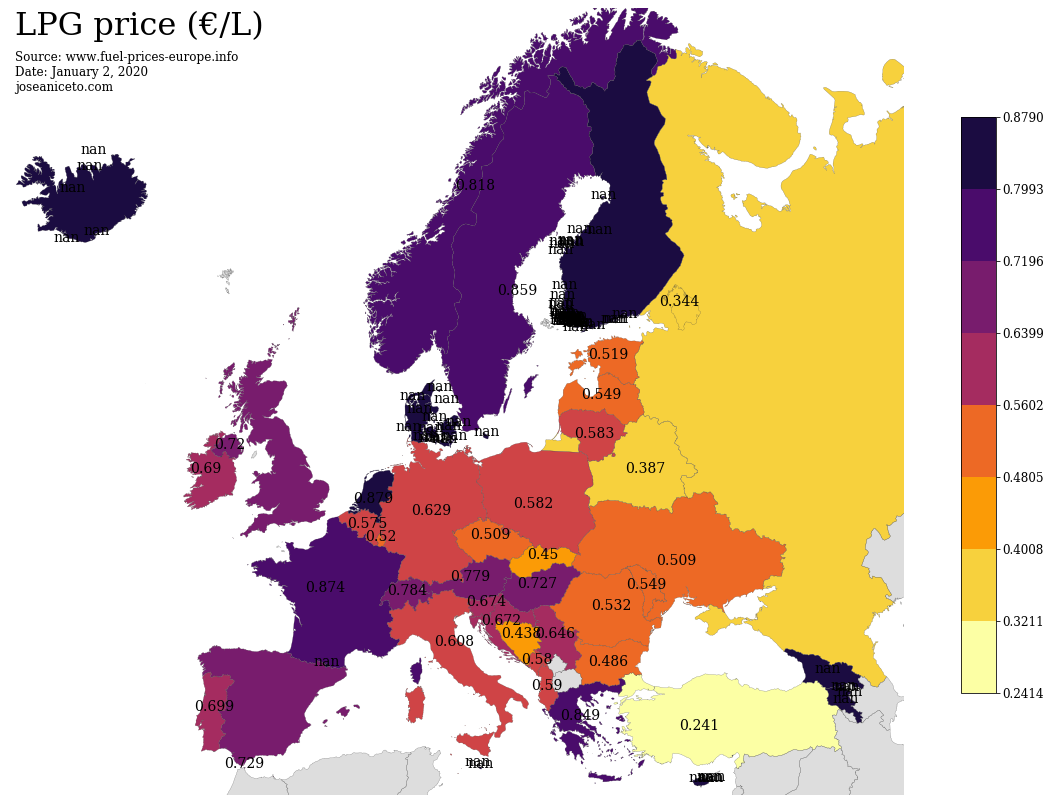

In [16]:
title = 'LPG price (€/L)'
description = f"""Source: www.fuel-prices-europe.info
Date: {df['record_date'][0]}
joseaniceto.com
"""

create_choropleth_labels(df, 'lpg_eur', 'bin_lpg', title, description, num_colors=9, colormap_name='inferno_r')

plt.savefig('choropleth_lpg_95.svg', bbox_inches='tight', pad_inches=.2)